In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import os
import locale
import calendar

In [13]:
usuario = os.getlogin()
arquivo_csv = fr'C:\Users\{usuario}\Documents\damage-controller\backend\Banco_de_Dados 2.CSV'

import locale
locale.setlocale(locale.LC_TIME, 'pt_BR.UTF-8')
locale.setlocale(locale.LC_TIME, 'Portuguese_Brazil.1252')

df = pd.read_csv(arquivo_csv, encoding='latin1', sep=';', on_bad_lines='skip')
mes_desejado = 4
df['DATA'] = pd.to_datetime(df['DATA'], dayfirst=True, errors='coerce')
df_filtrado = df[df['DATA'].notna()]
df_filtrado = df_filtrado[df_filtrado['DATA'].dt.month == mes_desejado]

C:\Users\kalve\AppData\Local\Temp\ipykernel_26616\535049581.py:8: DtypeWarning: Columns (5,7) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(arquivo_csv, encoding='latin1', sep=';', on_bad_lines='skip')


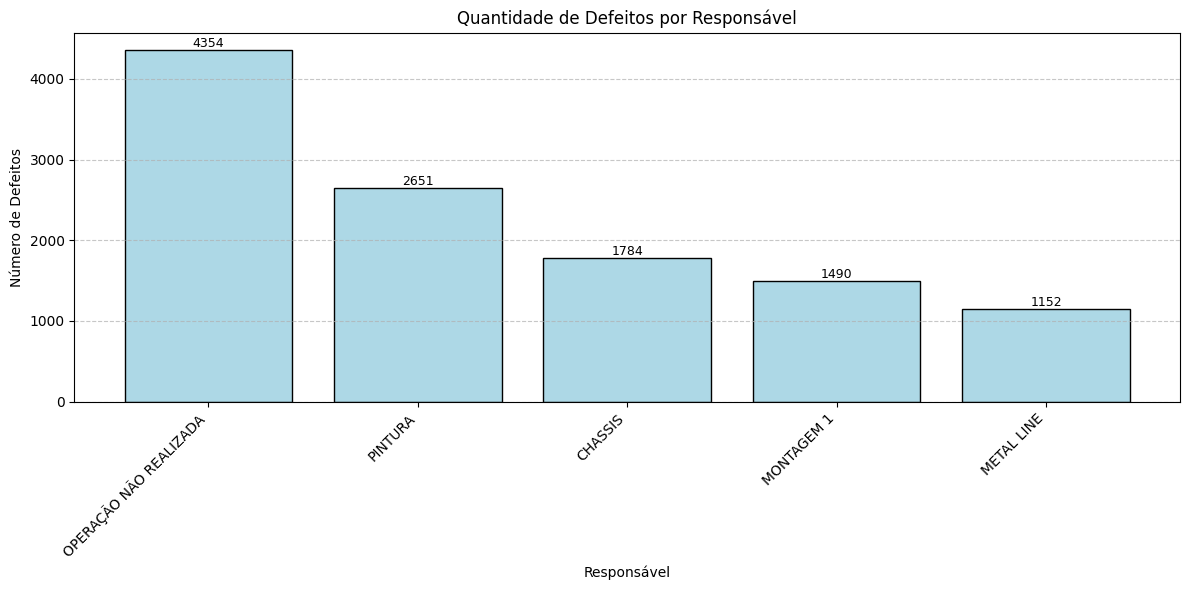

In [10]:
#responsável por defeitos

df['RESPONSÁVEL'] = df['RESPONSÁVEL'].fillna('')
df['DEFEITOS'] = df['DEFEITOS'].fillna('')

df_filtrado = df[
    (df['DEFEITOS'].str.strip() != '') &
    (df['DEFEITOS'].str.strip().str.upper() != 'O SEM DEFEITO')
]


contagem = df_filtrado['RESPONSÁVEL'].value_counts().head(5)


plt.figure(figsize=(12, 6))
bars = plt.bar(contagem.index, contagem.values, color='lightblue', edgecolor='black')


for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height + 0.5, f'{int(height)}',
             ha='center', va='bottom', fontsize=9)


plt.title('Quantidade de Defeitos por Responsável')
plt.xlabel('Responsável')
plt.ylabel('Número de Defeitos')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

C:\Users\kalve\AppData\Local\Temp\ipykernel_26616\3751701847.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtrado['DIA'] = df_filtrado['DATA'].dt.day


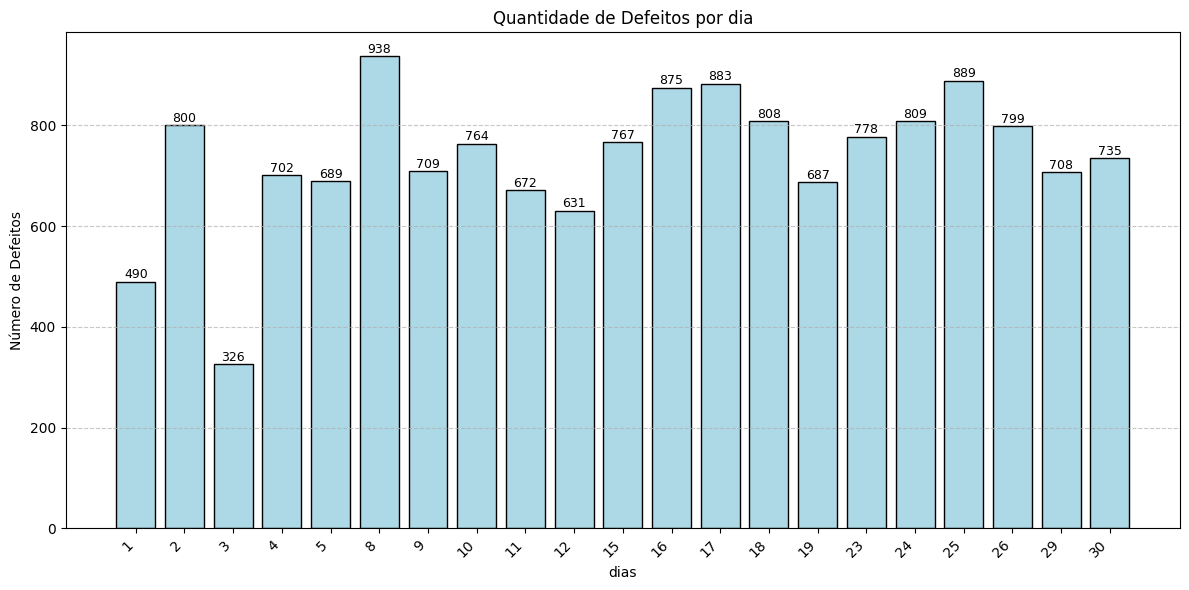

In [4]:
df['DEFEITOS'] = df['DEFEITOS'].fillna('')
df['DATA'] = df['DATA'].fillna('')
df['DATA'] = pd.to_datetime(df['DATA'], dayfirst=True, errors='coerce')
mes_desejado = 4

df_filtrado = df[
    (df['DEFEITOS'].str.strip() != '') &
    (df['DEFEITOS'].str.strip().str.upper() != 'O SEM DEFEITO') &
    (df['DATA'].notna()) &
    (df['DATA'].dt.month == mes_desejado)
]

df_filtrado['DIA'] = df_filtrado['DATA'].dt.day

contagem = df_filtrado['DIA'].value_counts().sort_index()

categorias = contagem.index.astype(str)
valores = contagem.values

plt.figure(figsize=(12, 6))
bars = plt.bar(categorias, valores, color='lightblue', edgecolor='black')
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height + 0.5, f'{int(height)}',
             ha='center', va='bottom', fontsize=9)
    
plt.title('Quantidade de Defeitos por dia')
plt.xlabel('dias')
plt.ylabel('Número de Defeitos')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

C:\Users\kalve\AppData\Local\Temp\ipykernel_26616\1144190546.py:2: DtypeWarning: Columns (5,7) have mixed types. Specify dtype option on import or set low_memory=False.
  lista = pd.read_csv(arquivo_csv, encoding='latin1', sep=';', on_bad_lines='skip')


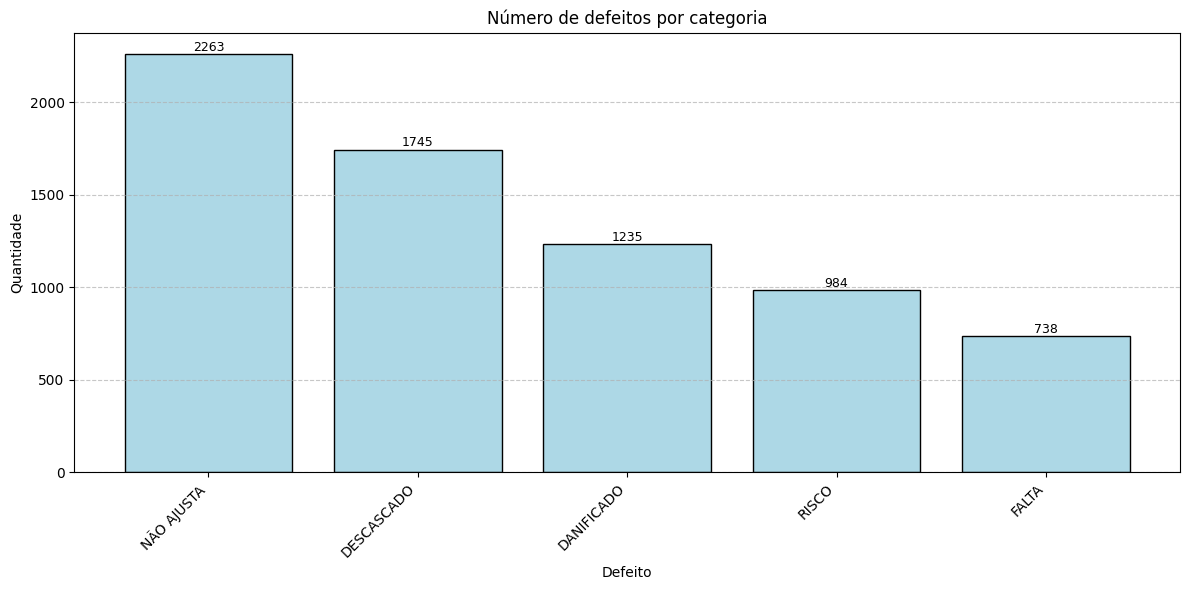

In [5]:
arquivo_csv = 'Banco_de_Dados 2.CSV'
lista = pd.read_csv(arquivo_csv, encoding='latin1', sep=';', on_bad_lines='skip')
lista['DEFEITOS'] = lista['DEFEITOS'].fillna('')

mascara = (
    lista['DEFEITOS'].str.strip().ne('')  # não-vazio
    & lista['DEFEITOS'].str.strip().str.upper().ne('O SEM DEFEITO')
)

lista_filtrada = lista.loc[mascara].copy()

contagem = lista_filtrada['DEFEITOS'].value_counts().head(5)

plt.figure(figsize=(12, 6))
bars = plt.bar(contagem.index, contagem.values, color='lightblue', edgecolor='black')


for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height + 0.5, f'{int(height)}',
             ha='center', va='bottom', fontsize=9)


plt.title('Número de defeitos por categoria')
plt.xlabel('Defeito')
plt.ylabel('Quantidade')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

C:\Users\kalve\AppData\Local\Temp\ipykernel_26616\2495610422.py:2: DtypeWarning: Columns (5,7) have mixed types. Specify dtype option on import or set low_memory=False.
  lista = pd.read_csv(arquivo_csv, encoding='latin1', sep=';', on_bad_lines='skip')


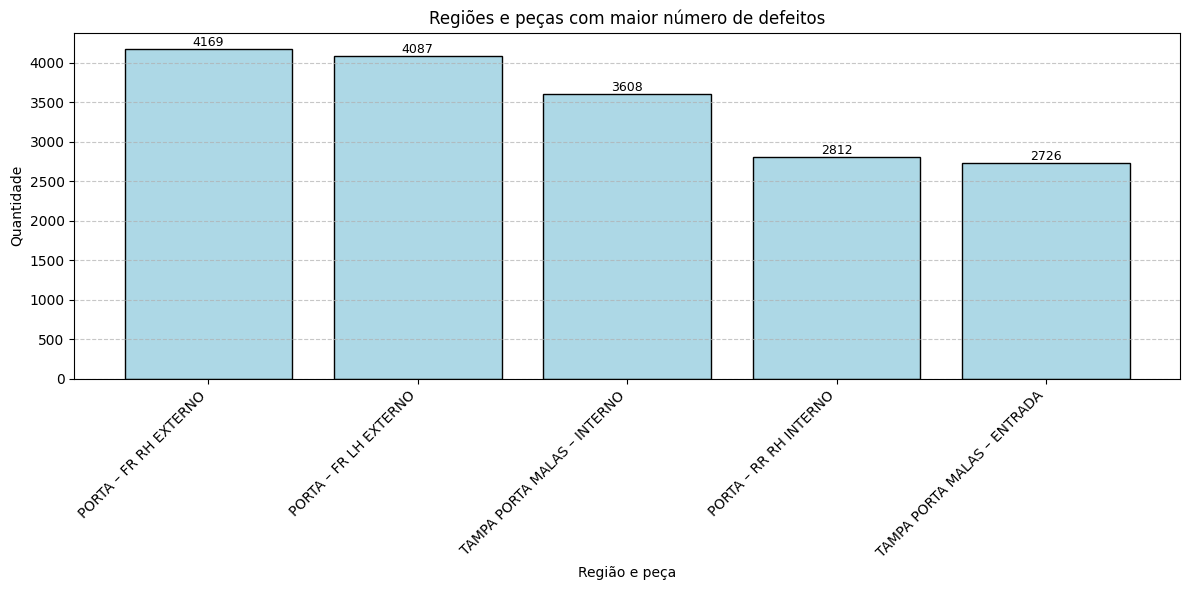

In [6]:
arquivo_csv = 'Banco_de_Dados 2.CSV'
lista = pd.read_csv(arquivo_csv, encoding='latin1', sep=';', on_bad_lines='skip')
lista['PEÇA AFETADA'] = lista['PEÇA AFETADA'].fillna('')
lista['REGIÃO'] = lista['REGIÃO'].fillna('')

mascara = (
    lista['PEÇA AFETADA'].str.strip().ne('')  # não-vazio
    & lista['REGIÃO'].str.strip().ne('')
)

lista_filtrada = lista.loc[mascara].copy()

lista_combinada = (
    lista_filtrada
    .groupby(["PEÇA AFETADA", "REGIÃO"])
    .size()
    .reset_index(name='QTD')
    .sort_values(by='QTD', ascending=False)
)

lista_combinada['LABEL'] = lista_combinada.apply(
    lambda row: f"{row['REGIÃO']} – {row['PEÇA AFETADA']}", axis=1
)

lista_combinada = lista_combinada.head(5)

rotulos = lista_combinada['LABEL'].tolist()
valores = lista_combinada['QTD'].tolist()

plt.figure(figsize=(12, 6))
bars = plt.bar(rotulos, valores, color='lightblue', edgecolor='black')


for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height + 0.5, f'{int(height)}',
             ha='center', va='bottom', fontsize=9)


plt.title('Regiões e peças com maior número de defeitos')
plt.xlabel('Região e peça')
plt.ylabel('Quantidade')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

C:\Users\kalve\AppData\Local\Temp\ipykernel_28216\440469042.py:2: DtypeWarning: Columns (5,7) have mixed types. Specify dtype option on import or set low_memory=False.
  lista = pd.read_csv(arquivo_csv, encoding='latin1', sep=';', on_bad_lines='skip')


TURNO_NORMALIZADO
1º TURNO    92072
2º TURNO    87373
Name: count, dtype: int64

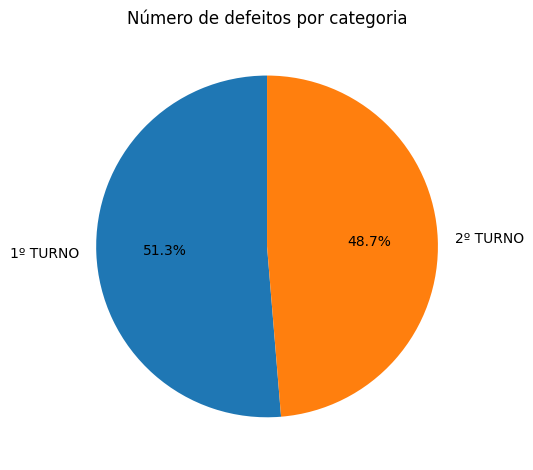

In [8]:
arquivo_csv = 'Banco_de_Dados 2.CSV'
lista = pd.read_csv(arquivo_csv, encoding='latin1', sep=';', on_bad_lines='skip')
lista['TURNO'] = lista['TURNO'].fillna('')
lista['TURNO'] = lista['TURNO'].str.replace(r"[\r\n]", "", regex=True)

mascara = (
    lista['TURNO'].str.strip().ne('')  # não-vazio
)

lista_filtrada = lista.loc[mascara].copy()

# Mapeamento das variações
mapeamento_regex = {
    "Shift #1": "1º TURNO",
    "Shift #2": "2º TURNO",
    "1T": "1º TURNO",
    "2T": "2º TURNO",
    "1º TURNO": "1º TURNO",
    "2º TURNO": "2º TURNO",
}

# Normalizar os valores
lista_filtrada['TURNO_NORMALIZADO'] = lista_filtrada['TURNO'].map(lambda x: mapeamento_regex.get(x, x))

contagem_turnos = lista_filtrada['TURNO_NORMALIZADO'].value_counts()

display(contagem_turnos)

fig, ax = plt.subplots()
ax.pie(x=contagem_turnos.values, labels=contagem_turnos.index, autopct='%1.1f%%', startangle=90)
plt.title('Número de defeitos por categoria')
plt.tight_layout()
plt.show()

C:\Users\kalve\AppData\Local\Temp\ipykernel_26616\2945368707.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtrado['MES'] = df_filtrado['DATA'].dt.month


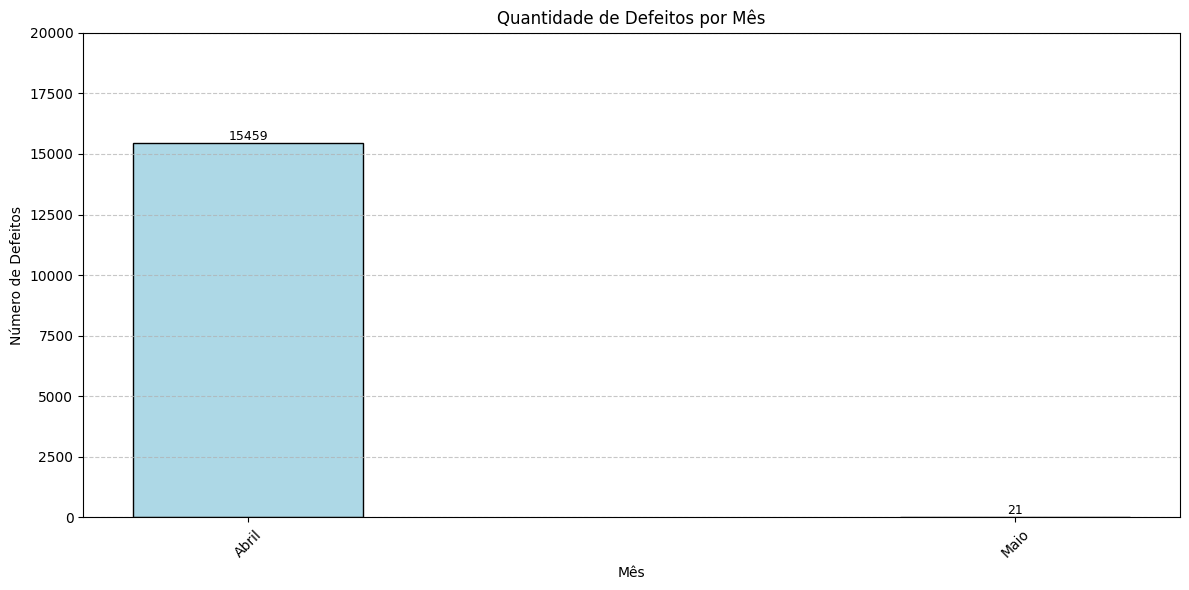

In [ ]:
#defeitos por mês

df['DEFEITOS'] = df['DEFEITOS'].fillna('')
df['DATA'] = df['DATA'].fillna('')
df['DATA'] = pd.to_datetime(df['DATA'], dayfirst=True, errors='coerce')

df_filtrado = df[
    (df['DEFEITOS'].str.strip() != '') &
    (df['DEFEITOS'].str.strip().str.upper() != 'O SEM DEFEITO') &
    (df['DATA'].notna())
]

df_filtrado['MES'] = df_filtrado['DATA'].dt.month

contagem = df_filtrado['MES'].value_counts().sort_index()

categorias = [calendar.month_name[mes].capitalize() for mes in contagem.index]
valores = contagem.values

plt.figure(figsize=(12, 6))
bars = plt.bar(categorias, valores, color='lightblue', edgecolor='black',width=0.3)
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height + 0.5, f'{int(height)}',
             ha='center', va='bottom', fontsize=9)

plt.title('Quantidade de Defeitos por Mês')
plt.xlabel('Mês')
plt.ylabel('Número de Defeitos')
plt.xticks(rotation=45, ha='center')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()
